# Market Basket Anlysis pada Data Online Retail

## Exploratory Data Analysis

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime as dt

# Parameter Konfigurasi Runtime untuk Matplotlib
plt.rcParams['font.family'] = 'Verdana'
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# Read data
df = pd.read_csv('CleanOnlineRetail.csv', encoding = 'unicode_escape')
df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_34416\956812423.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('CleanOnlineRetail.csv', encoding = 'unicode_escape')


,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Hour,Time of Day,Month,Week of the Year,Day of Week,Sales Revenue
0,0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313,United Kingdom,2011-01-04,10:00:00,10,Morning,January,1,Tuesday,19.5
1,1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,2011-01-04,10:00:00,10,Morning,January,1,Tuesday,10.5
2,2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,2011-01-04,10:00:00,10,Morning,January,1,Tuesday,10.5
3,3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313,United Kingdom,2011-01-04,10:00:00,10,Morning,January,1,Tuesday,10.5
4,4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313,United Kingdom,2011-01-04,10:00:00,10,Morning,January,1,Tuesday,12.5


### 1. Top 10 countries dan jumlah total order

In [4]:
# With United Kingdom
country_data_w_uk= df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending = False).reset_index()
country_data_w_uk_subset = country_data_w_uk.head(10)

In [5]:
country_data_w_uk_subset

,Country,InvoiceNo
0,United Kingdom,16473
1,Germany,414
2,France,362
3,EIRE,266
4,Belgium,93
5,Netherlands,90
6,Spain,84
7,Australia,53
8,Switzerland,48
9,Portugal,44


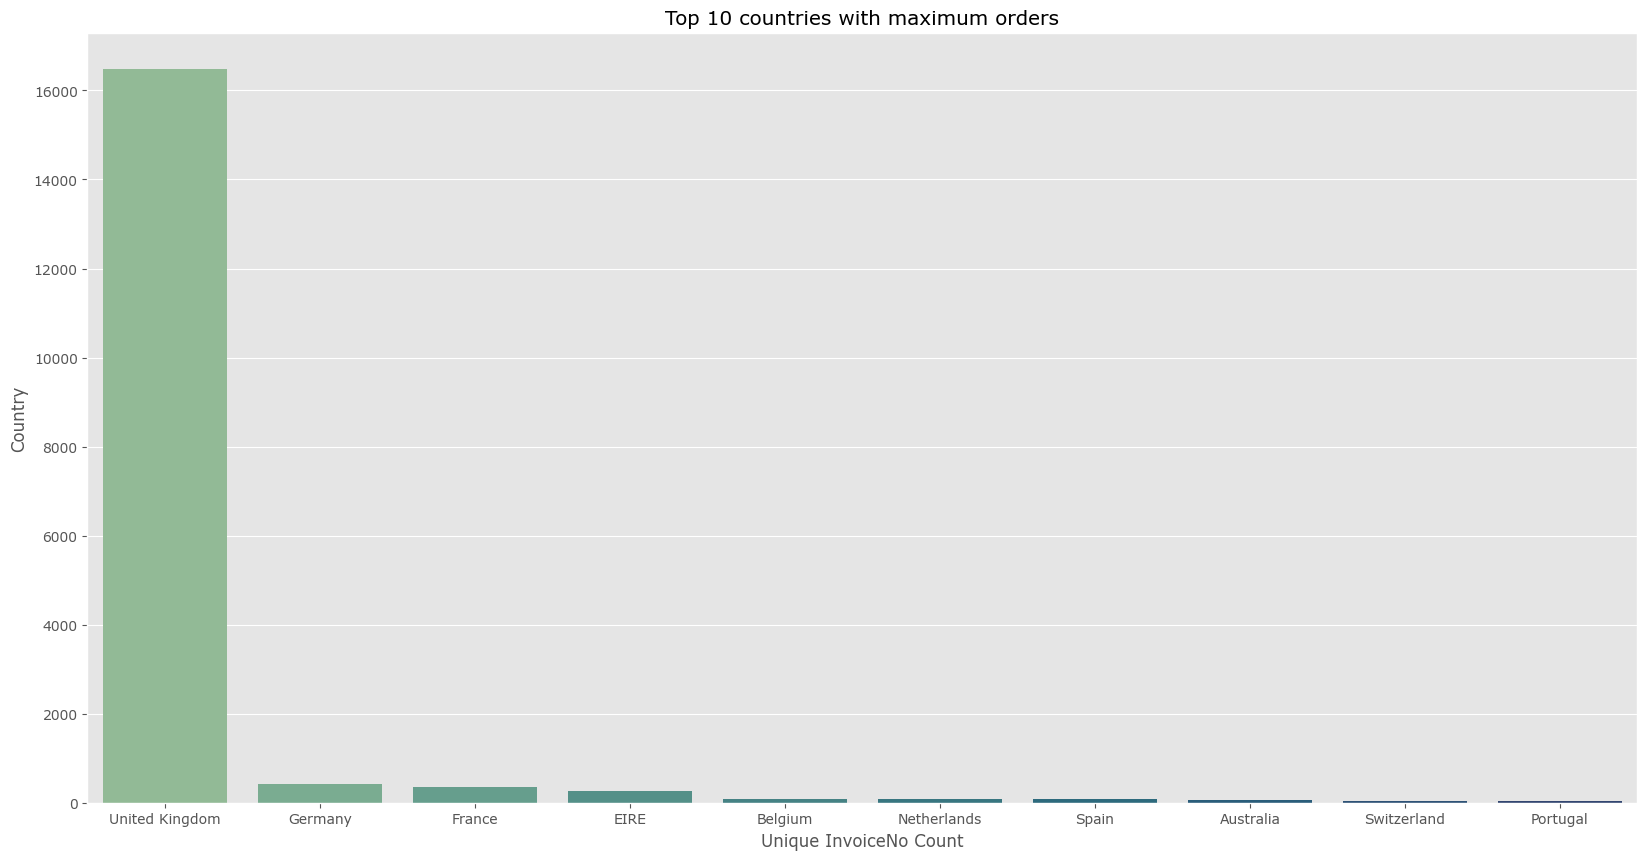

In [6]:
# Plotting
sns.barplot(data = country_data_w_uk_subset, x ="Country", y = "InvoiceNo", palette = 'crest')

# Labelling
plt.title('Top 10 countries with maximum orders')
plt.xlabel('Unique InvoiceNo Count')
plt.ylabel('Country')

# Set size for plot
fig = plt.gcf()
fig.set_size_inches(20,10)

Keterangan:
- United Kingdom memiliki lebih dari 16000 InvoiceNo

In [7]:
# Aggregating on Countries without United Kingdom
country_data_wo_uk = df[df['Country']!='United Kingdom'].groupby('Country')['InvoiceNo'].nunique().sort_values(ascending = False).reset_index()
country_data_wo_uk_subset = country_data_wo_uk.head(10)

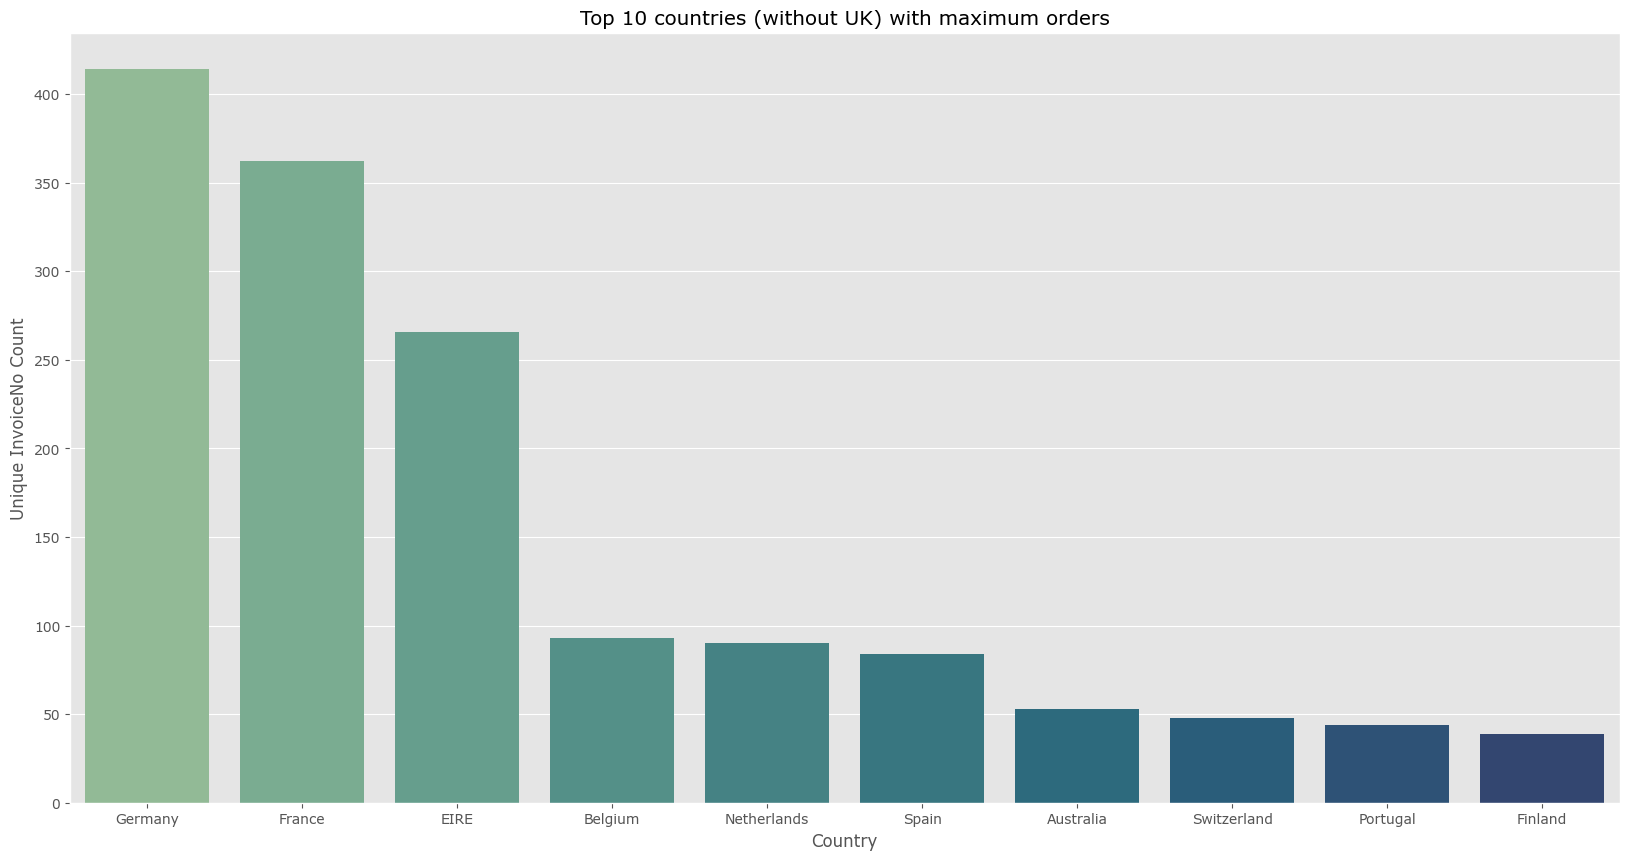

In [8]:
# Plotting
sns.barplot(data = country_data_wo_uk_subset, x ="Country", y = "InvoiceNo", palette = 'crest')

# Labelling
plt.title('Top 10 countries (without UK) with maximum orders')
plt.ylabel('Unique InvoiceNo Count')
plt.xlabel('Country')

# Set size for plot
fig = plt.gcf()
fig.set_size_inches(20,10)

Keterangan:
- Jerman di posisi kedua dnegan InvoiceNo sekitar lebih dari 400

### 2. Total pendapatan penjualan untuk setiap negara

In [9]:
print(df.columns)

Index(['Unnamed: 0', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'Date', 'Time',
       'Hour', 'Time of Day', 'Month', 'Week of the Year', 'Day of Week',
       'Sales Revenue'],
      dtype='object')


In [10]:
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Hour,Time of Day,Month,Week of the Year,Day of Week,Sales Revenue
0,0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313,United Kingdom,2011-01-04,10:00:00,10,Morning,January,1,Tuesday,19.5
1,1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,2011-01-04,10:00:00,10,Morning,January,1,Tuesday,10.5
2,2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,2011-01-04,10:00:00,10,Morning,January,1,Tuesday,10.5
3,3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313,United Kingdom,2011-01-04,10:00:00,10,Morning,January,1,Tuesday,10.5
4,4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313,United Kingdom,2011-01-04,10:00:00,10,Morning,January,1,Tuesday,12.5


In [12]:
# Convert kolom 'Sales Revenue' to numerik
df['Sales Revenue'] = pd.to_numeric(df['Sales Revenue'], errors='coerce')

# Filter baris yang 'Country' bukan 'United Kingdom'
filtered_data = df[df['Country'] != 'United Kingdom']
filtered_data_uk = df[df['Country'] == 'United Kingdom']

# Group by 'Country', jumlahkan 'Sales Revenue' dan urutkan
sales_wo_uk = filtered_data.groupby('Country')['Sales Revenue'].sum().reset_index().sort_values(by='Sales Revenue', ascending=False)
sales_uk = filtered_data_uk.groupby('Country')['Sales Revenue'].sum().reset_index().sort_values(by='Sales Revenue', ascending=False)

In [13]:
print(sales_wo_uk)

                 Country  Sales Revenue
23           Netherlands      275134.86
10                  EIRE      261167.60
14               Germany      192137.41
13                France      175962.69
0              Australia      137138.46
30                 Spain       54002.83
32           Switzerland       51840.68
3                Belgium       35327.43
31                Sweden       32994.53
20                 Japan       29711.30
24                Norway       28667.52
26              Portugal       24903.14
6        Channel Islands       19684.01
12               Finland       17692.08
9                Denmark       17073.84
19                 Italy       15169.74
7                 Cyprus       11580.09
16             Hong Kong        9744.19
29             Singapore        9120.39
1                Austria        8585.48
18                Israel        8129.41
25                Poland        6726.49
15                Greece        4425.52
17               Iceland        3598.21


In [14]:
print(sales_uk)

          Country  Sales Revenue
0  United Kingdom    8212829.444


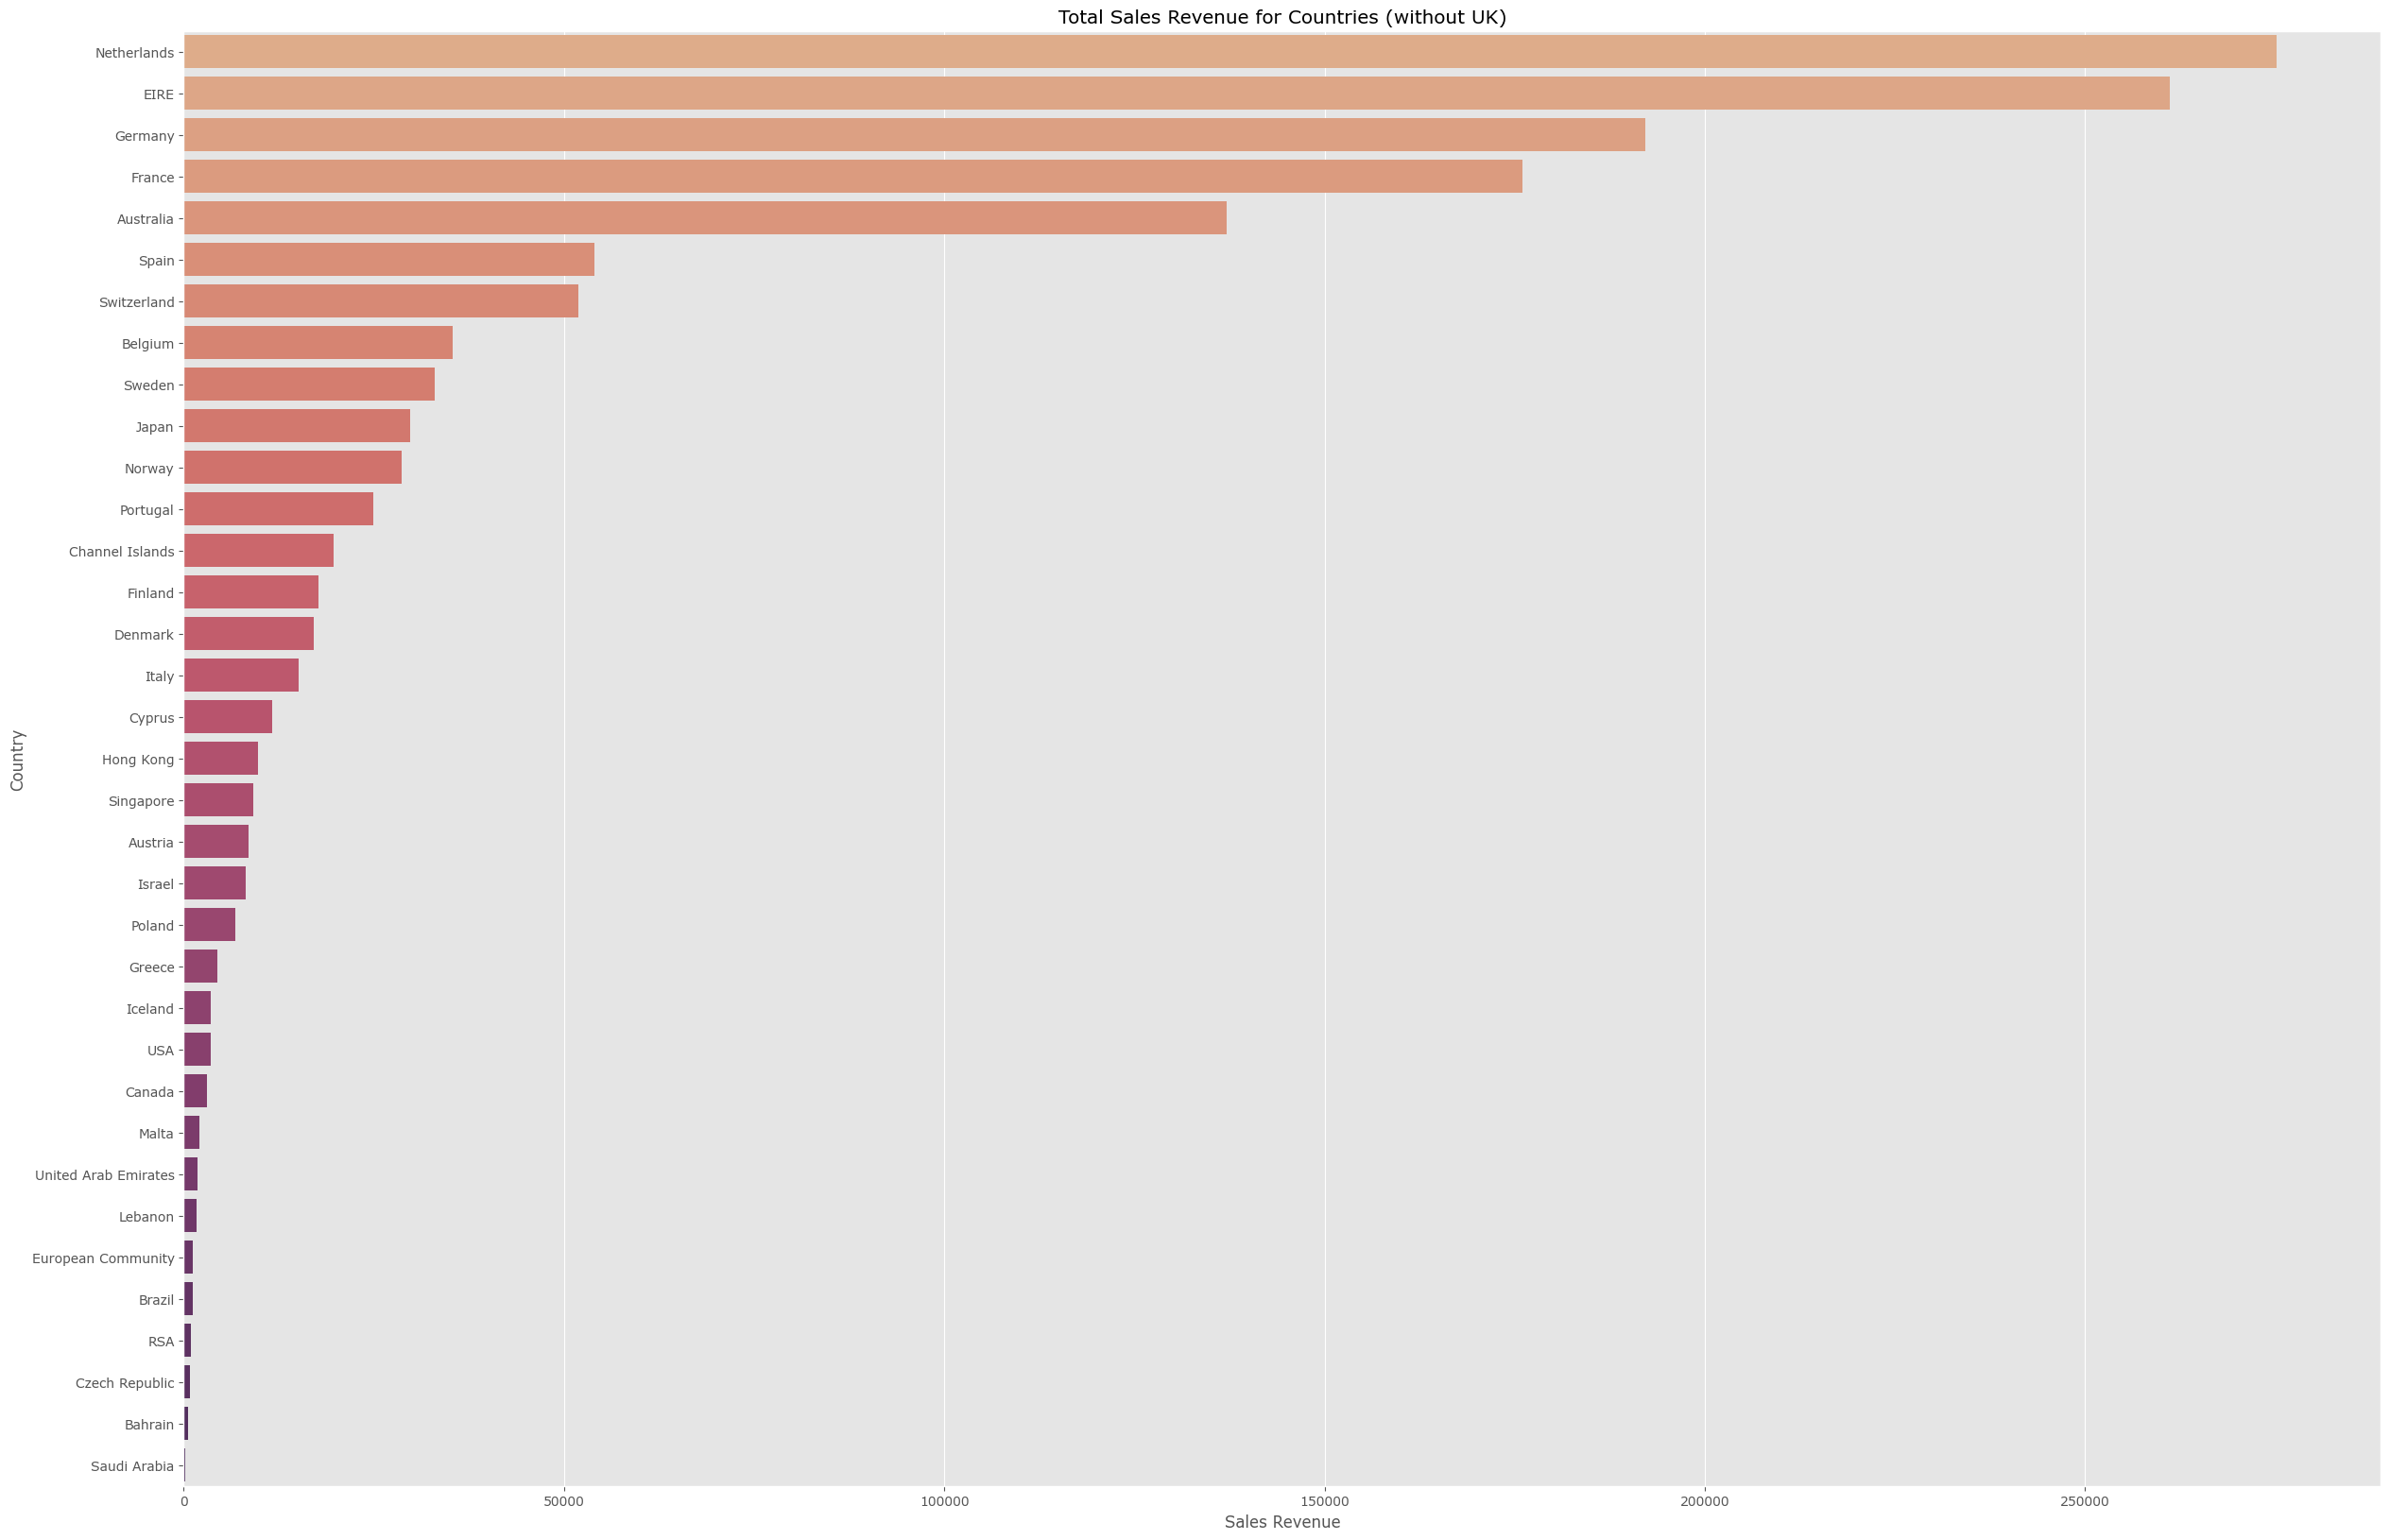

In [15]:
# Plotting
sns.barplot(data = sales_wo_uk, x ="Sales Revenue", y = "Country", palette = 'flare')

# Labelling
plt.title('Total Sales Revenue for Countries (without UK)')
plt.ylabel('Country')
plt.xlabel('Sales Revenue')

# Set size for plot
fig = plt.gcf()
fig.set_size_inches(30,20)

### 3. Jumlah total barang yang dijual untuk setiap negara (kecual uk)

In [17]:
# Hitung jumlah total barang yang dijual untuk setiap negara
total_quantity_sold = df[df['Country'] != 'United Kingdom'].groupby('Country')['Quantity'].sum().reset_index()
total_quantity_sold_uk = df[df['Country'] == 'United Kingdom'].groupby('Country')['Quantity'].sum().reset_index()

In [18]:
print(total_quantity_sold_uk)

          Country  Quantity
0  United Kingdom   4327109


In [19]:
print(total_quantity_sold)

                 Country  Quantity
0              Australia     83433
1                Austria      4796
2                Bahrain       260
3                Belgium     21220
4                 Brazil       356
5                 Canada      2762
6        Channel Islands      9402
7                 Cyprus      5422
8         Czech Republic       670
9                Denmark      7747
10                  EIRE    141133
11    European Community       490
12               Finland      9360
13                France    106290
14               Germany    111276
15                Greece      1550
16             Hong Kong      4708
17               Iceland      2139
18                Israel      4406
19                 Italy      7777
20                 Japan     21923
21               Lebanon       386
22                 Malta       958
23           Netherlands    193449
24                Norway     15694
25                Poland      3535
26              Portugal     15156
27                  

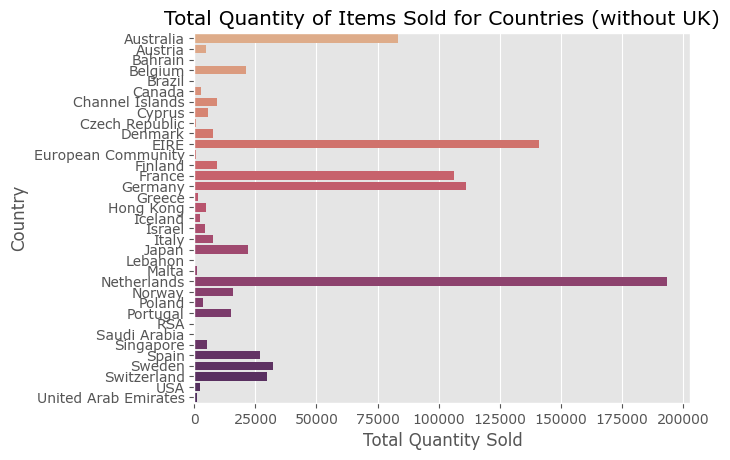

In [20]:
# Plotting
sns.barplot(data=total_quantity_sold, x="Quantity", y="Country", palette='flare')

# Labelling
plt.title('Total Quantity of Items Sold for Countries (without UK)')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Country')

# Show the plot
plt.show()

### 4. Monthly statistics

In [21]:
# Function untuk mengelompokkan berdasarkan Bulan/Tanggal/Hari dalam Seminggu/Minggu dalam Tahun/Waktu dalam Sehari
def group_sales_quantity(df, feature):
    df = df[[f'{feature}','Quantity','Sales Revenue']].groupby([f'{feature}']).sum().sort_values(by= 'Sales Revenue', ascending = False).reset_index()
    return df

Text(0.5, 0, 'Total Sales Revenue')

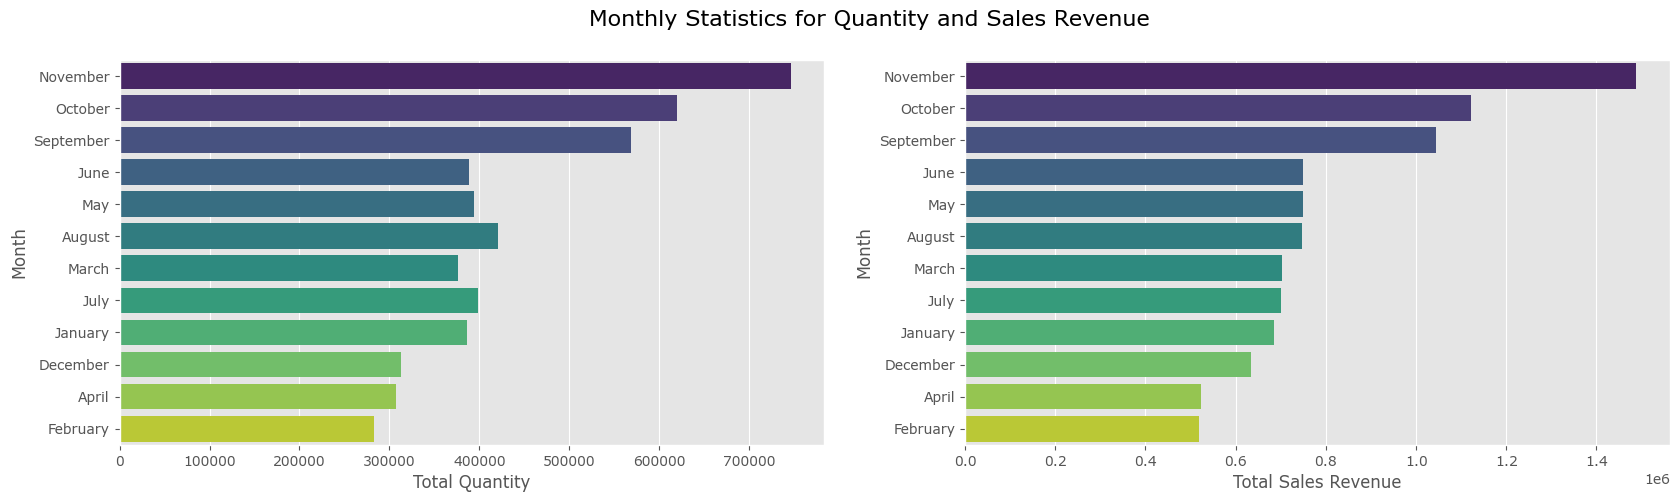

In [22]:
# Get monthly stats dataframe
monthly_stats = group_sales_quantity(df, 'Month')
# Plot
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
fig.suptitle('Monthly Statistics for Quantity and Sales Revenue', fontsize=16)

# Distribution of price, after outlier handling
sns.barplot(data = monthly_stats, x = "Quantity", y = "Month" , palette = 'viridis', ax = ax[0])
ax[0].set_xlabel('Total Quantity')

# Log transformation and handling neg values with log(1+x)
sns.barplot(data = monthly_stats, x = "Sales Revenue", y = "Month", palette = 'viridis', ax = ax[1])
ax[1].set_xlabel('Total Sales Revenue')

Keterangan:
- Statistik bulanan untuk bulan November adalah yang tertinggi

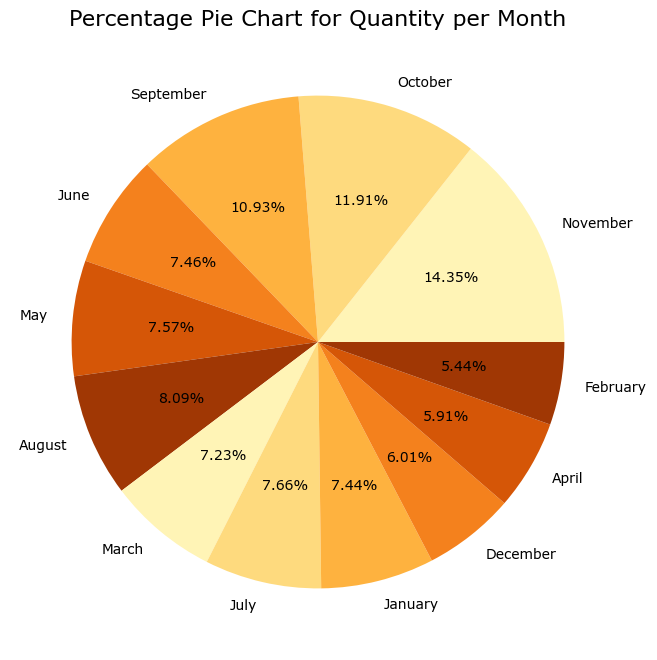

In [23]:
# Colour palette
palette_color = sns.color_palette('YlOrBr')

# Quantity per month
plt.pie(monthly_stats['Quantity'], labels = monthly_stats['Month'], colors=palette_color, autopct='%.02f%%')
plt.title('Percentage Pie Chart for Quantity per Month', fontsize=16)

# Displaying chart
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

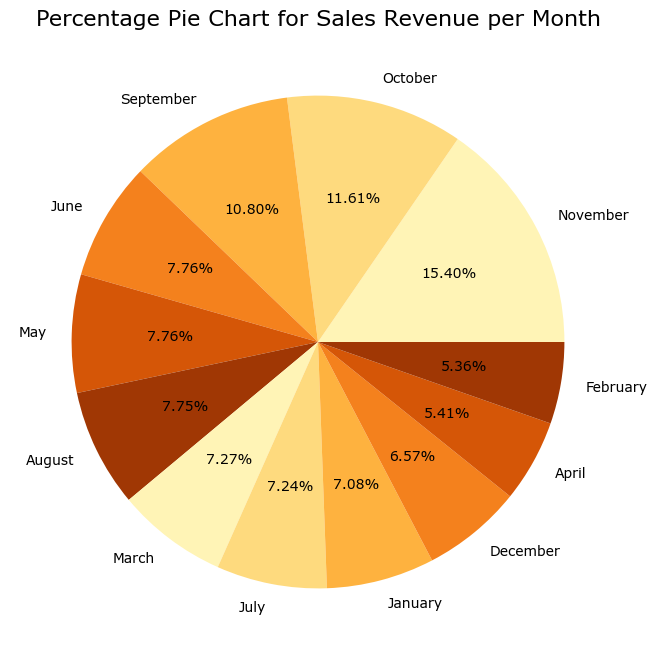

In [24]:
# Sales Revenue per month
plt.pie(monthly_stats['Sales Revenue'], labels = monthly_stats['Month'], colors=palette_color, autopct='%.02f%%')
plt.title('Percentage Pie Chart for Sales Revenue per Month', fontsize=16)

# Displaying chart
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

Keterangan:
- Penjualan tertinggi (berdasarkan pendapatan dan kuantitas) terjadi pada bulan September, Oktober, November (musim gugur)
- Persentase penjualan terendah (berdasarkan pendapatan dan kuantitas) tercatat pada Januari, Februari, Maret, April (musim dingin), kemungkinan karena orang tidak dapat meninggalkan rumah karena cuaca buruk

### 5. Daily statistics

#### 5.1 Day of week

Text(0, 0.5, 'Day of Week')

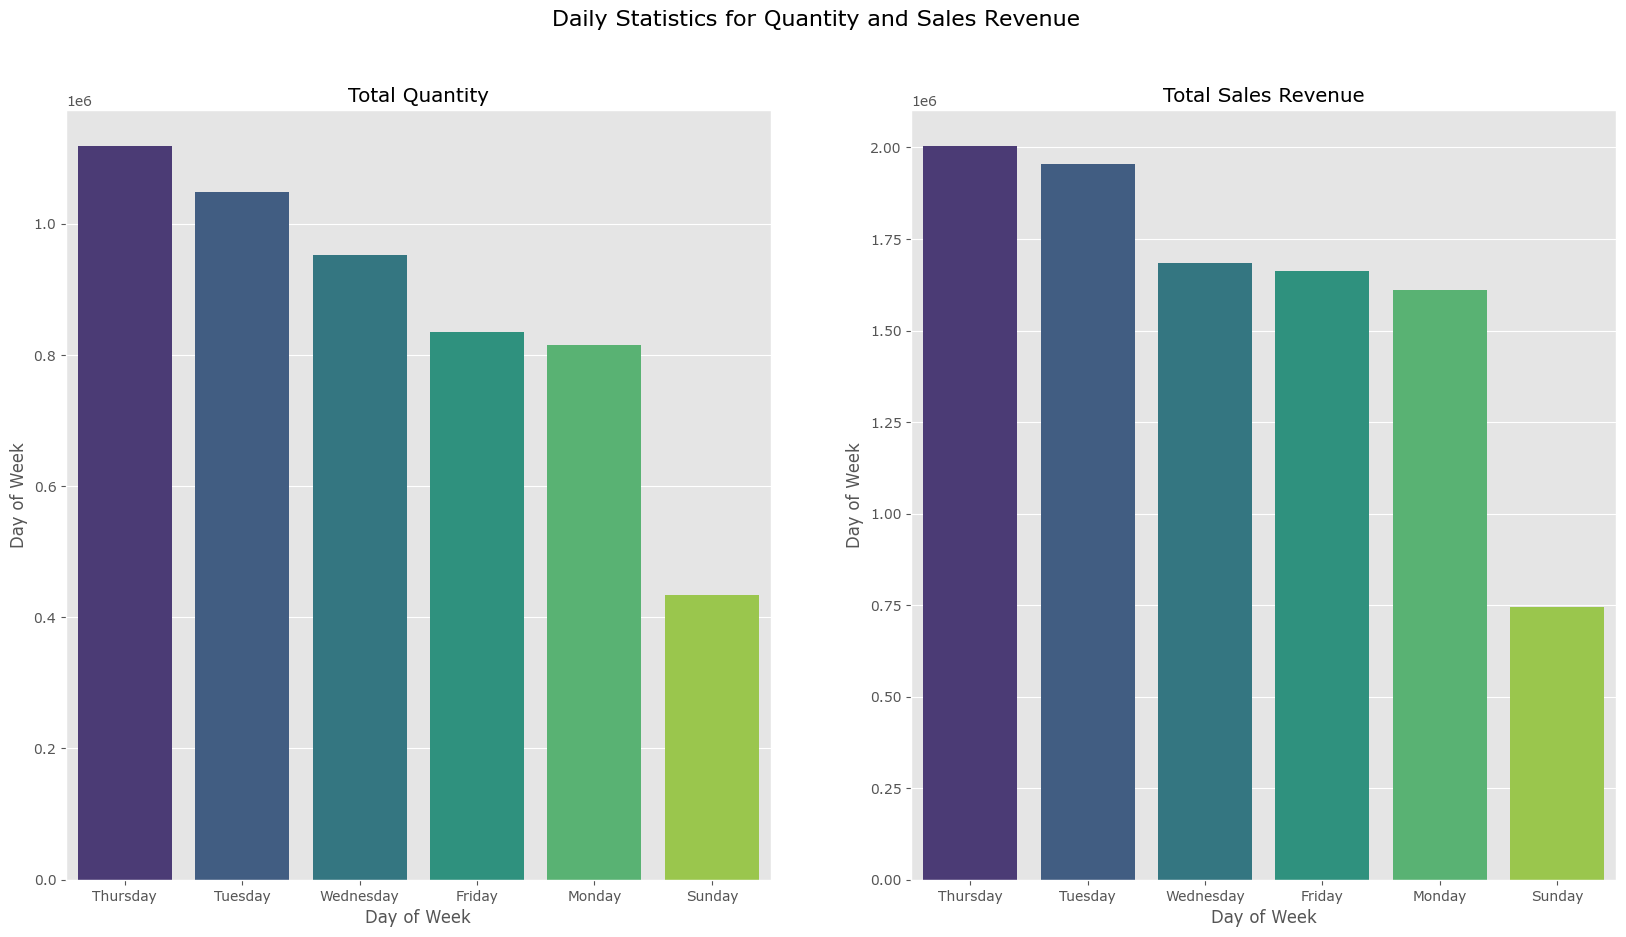

In [25]:
# Get daily stats dataframe
daily_stats = group_sales_quantity(df, 'Day of Week')
# Plot
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
fig.suptitle('Daily Statistics for Quantity and Sales Revenue', fontsize=16)

sns.barplot(data = daily_stats, x = "Day of Week", y = "Quantity" , palette = 'viridis', ax = ax[0])
ax[0].set_title('Total Quantity')
ax[0].set_ylabel('Day of Week')

sns.barplot(data = daily_stats, x = "Day of Week", y = "Sales Revenue", palette = 'viridis', ax = ax[1])
ax[1].set_title('Total Sales Revenue')
ax[1].set_ylabel('Day of Week')

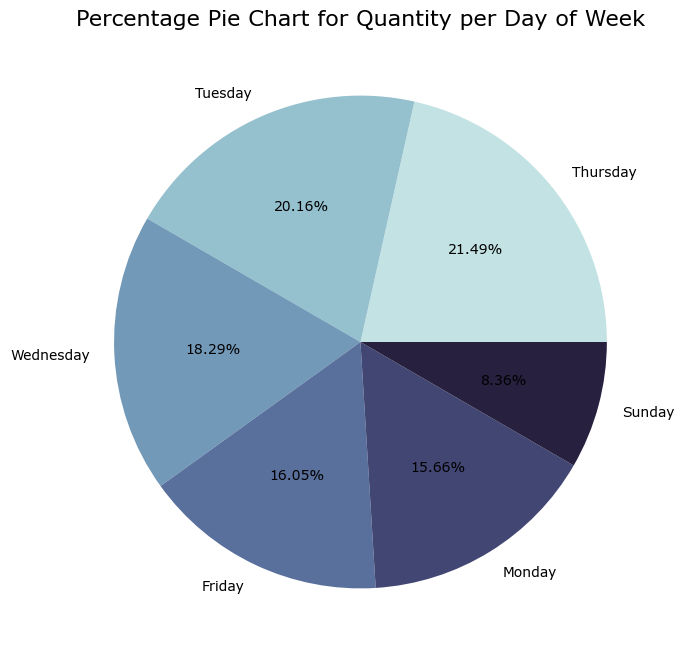

In [26]:
# Colour palette
palette_color = sns.color_palette('ch:start=.2,rot=-.3')

# Quantity per day of week
plt.pie(daily_stats['Quantity'], labels = daily_stats['Day of Week'], colors=palette_color, autopct='%.02f%%')
plt.title('Percentage Pie Chart for Quantity per Day of Week', fontsize=16)

# Displaying chart
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

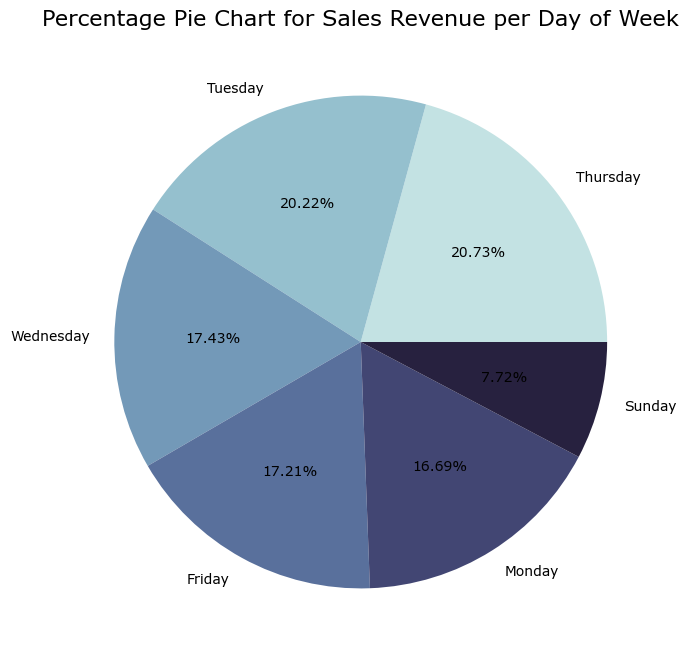

In [27]:
# Sales Revenue per Day of Week
plt.pie(daily_stats['Sales Revenue'], labels = daily_stats['Day of Week'], colors=palette_color, autopct='%.02f%%')
plt.title('Percentage Pie Chart for Sales Revenue per Day of Week', fontsize=16)

# Displaying chart
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

Keterangan:
- Orang-orang membeli lebih banyak pada hari Kamis kemungkinan untuk mempersiapkan akhir pekan, diikuti pada hari Selasa kemungkinan untuk mempersiapkan minggu depan
- Penjualan paling sedikit tercatat pada hari Minggu

#### 5.2 Time of day

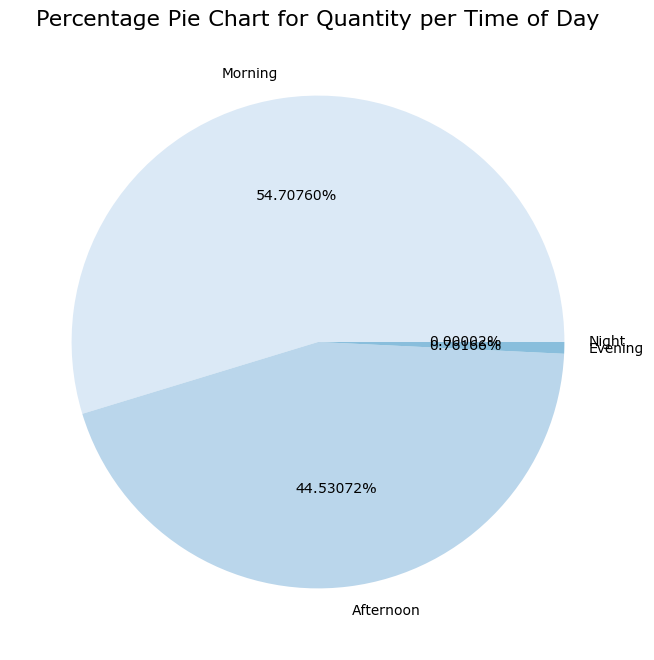

In [28]:
# Get time of day stats dataframe
timeofday_stats = group_sales_quantity(df, 'Time of Day')

# Colour palette
palette_color = sns.color_palette('Blues')

# Quantity per day of week
plt.pie(timeofday_stats['Quantity'], labels = timeofday_stats['Time of Day'], colors=palette_color, autopct='%.05f%%')
plt.title('Percentage Pie Chart for Quantity per Time of Day', fontsize=16)

# Displaying chart
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

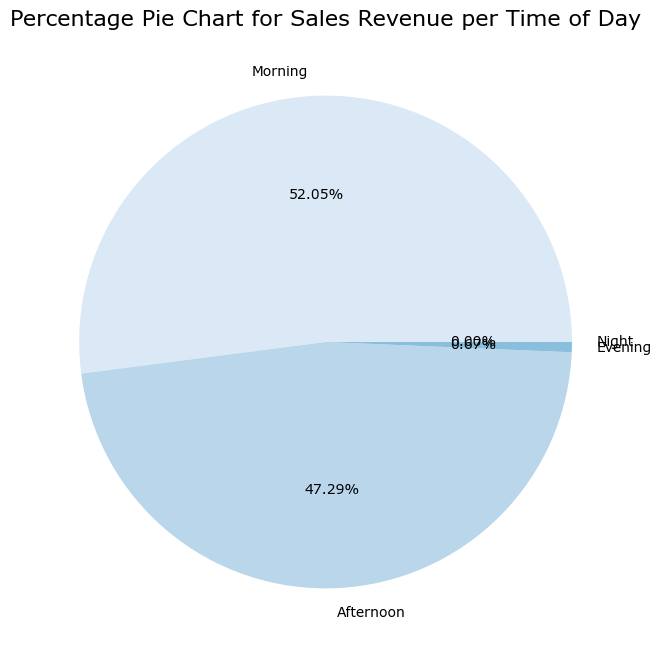

In [29]:
# Get time of day stats dataframe
timeofday_stats = group_sales_quantity(df, 'Time of Day')

# Colour palette
palette_color = sns.color_palette('Blues')

# Quantity per day of week
plt.pie(timeofday_stats['Sales Revenue'], labels = timeofday_stats['Time of Day'], colors=palette_color, autopct='%.02f%%')
plt.title('Percentage Pie Chart for Sales Revenue per Time of Day', fontsize=16)

# Displaying chart
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

Keterangan:
- Orang-orang cenderung membeli lebih banyak pada pagi hari dibandingkan pada malam hari

### 6. Penjualan setiap jam

#### 6.1 Jumlah barang yang terjual per jam

In [30]:
# Convert kolom 'Quantity' to numeric, jika terdapat error ubah menjadi NaN
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

# Drop rows with NaN values in 'Quantity' column
df.dropna(subset=['Quantity'], inplace=True)

# Aggregate on Hour
hourly_quantity = df.groupby('Hour')['Quantity'].sum().reset_index()

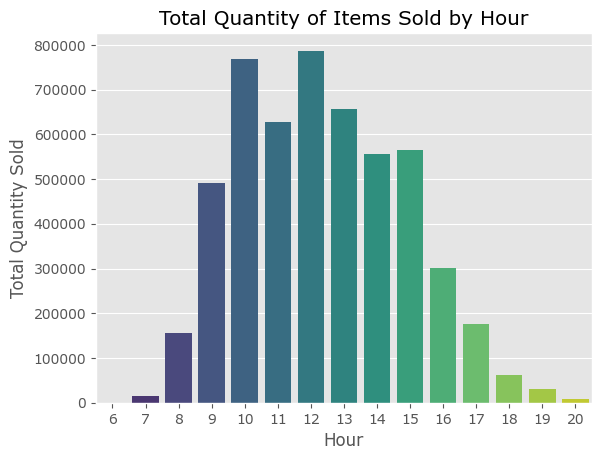

In [31]:
# Plot
sns.barplot(data=hourly_quantity, x="Hour", y="Quantity", palette='viridis')

# Labelling
plt.title('Total Quantity of Items Sold by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Quantity Sold')

# Show the plot
plt.show()

Keterangan:
- Volume barang tertinggi terjual pada jam 10-12 pagi

#### 6.2 Penjualan setiap jam menggunakan jumlah transaksi

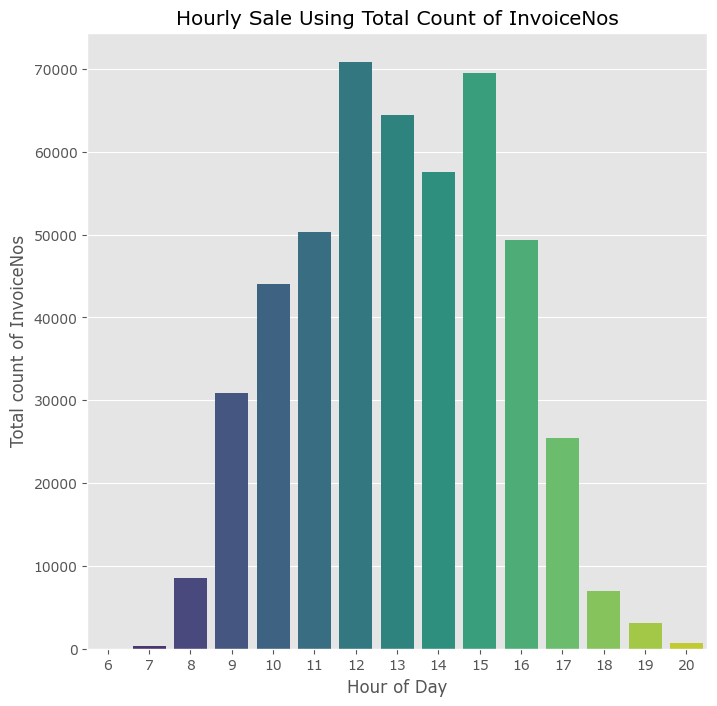

In [32]:
# Aggregate on Hour 
hourly_orders = df.groupby('Hour').count()['InvoiceNo'].reset_index()

# Plot
sns.barplot(data = hourly_orders, x = "Hour", y = "InvoiceNo" , palette = 'viridis')
plt.title('Hourly Sale Using Total Count of InvoiceNos')
plt.ylabel('Total count of InvoiceNos')
plt.xlabel('Hour of Day')

# Displaying chart
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

Keterangan:
- Jumlah pesanan tertinggi dilakukan sekitar tengah hari (jam 12 siang), diikuti jam 3 sore di sore hari

### 7. CustomerID

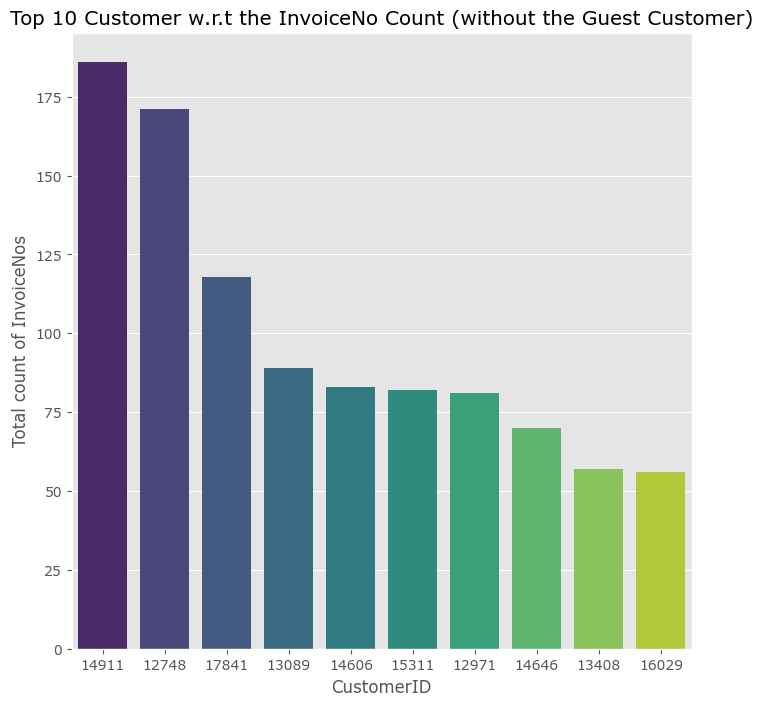

In [33]:
# Top 10 customers without 'Guest Customer'
top_customers = df[df["CustomerID"] != "Guest Customer"].groupby("CustomerID")["InvoiceNo"].nunique().sort_values(ascending = False).reset_index().head(10)

# Plot
sns.barplot(data = top_customers, x = "CustomerID", y = "InvoiceNo" , palette = 'viridis')
plt.title('Top 10 Customer w.r.t the InvoiceNo Count (without the Guest Customer)')
plt.ylabel('Total count of InvoiceNos')
plt.xlabel('CustomerID')

# Displaying chart
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

### 8. Top products

#### 8.1 Top produk berdasarkan jumlah yang terjual

In [35]:
# Top 10 Product Description by Quantity
top_products_qty = group_sales_quantity(df, 'Description').sort_values(ascending=False, by = "Quantity").reset_index(drop=True)
top_products_qty.drop('Sales Revenue', axis=1, inplace=True)
top_products_qty.head()

,Description,Quantity
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,78033
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,49660
3,JUMBO BAG RED RETROSPOT,46220
4,POPCORN HOLDER,36746


#### 8.2 Top produk berdasarkan pendapatan penjualan

In [36]:
# Top 10 Product Description by Sales Revenue
top_products_revenue = group_sales_quantity(df, 'Description').sort_values(ascending=False, by = "Sales Revenue").reset_index(drop=True)
top_products_revenue.drop('Quantity', axis=1, inplace=True)
top_products_revenue.head()

,Description,Sales Revenue
0,DOTCOM POSTAGE,181577.58
1,"PAPER CRAFT , LITTLE BIRDIE",168469.60
2,REGENCY CAKESTAND 3 TIER,146436.28
3,PARTY BUNTING,98237.49
4,WHITE HANGING HEART T-LIGHT HOLDER,95002.50
